

## Fechas
### Rafa Caballero

A menudo tenemos que trabajar con fechas. Una operación habitual es tener que convertir un string a formato fecha. Para eso utilizaremos la función `strptime`

In [ ]:
from datetime import datetime

date_time_str1 = '18/09/19 01:55:19'

date_time1 = datetime.strptime(date_time_str1, '%d/%m/%y %H:%M:%S')


print ("El tipo ahora es ",  type(date_time1))
print ("El valor es ", date_time1)

El tipo ahora es  <class 'datetime.datetime'>
El valor es  2019-09-18 01:55:19


La lista de formatos posibles se puede ver [aquí](https://docs.python.org/3.7/library/datetime.html?highlight=strptime#strftime-strptime-behavior)

In [ ]:
date_time_str2 = '16-09-21| 22:55:19'

date_time2 = datetime.strptime(date_time_str2, '%d-%m-%y| %H:%M:%S')


print ("El tipo ahora es ",  type(date_time2))
print ("El valor es ", date_time2)

El tipo ahora es  <class 'datetime.datetime'>
El valor es  2021-09-16 22:55:19


Una ventaja de tener el tipo fecha es que podemos obtener los componentes y hacer operaciones

In [ ]:
date_time2.day

16

Las diferencias de fechas son los llamados "deltas"

In [ ]:
dif = date_time2 - date_time1
dif

datetime.timedelta(days=729, seconds=75600)

In [ ]:
date_time2 + dif

datetime.datetime(2023, 9, 16, 19, 55, 19)

La función inversa es strftime

In [ ]:
sfecha = date_time2.strftime("%Y-%m-%d, %H:%M:%S")
print("fecha:",sfecha)

fecha: 2021-09-16, 22:55:19


**Ejercicio** Consideramos el siguiente fichero

In [ ]:
fileIn = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/tusa2020.csv"
import pandas as pd
df = pd.read_csv(fileIn)
print(f"Tipo created_at: {df.created_at.dtype}")
df

object


,_id,text,userid,screen_name,created_at,lang,quote_count,reply_count,retweet_count,favorite_count,coordinates,reply,quote,RT,RT_source,nRTin
0,1322162444786126848,Winners attract other winners,289706821,thatguy0603,2020-10-30T13:04:26.000Z,en,0.0,0.0,0.0,0.0,NaN,False,True,False,NaN,0.0
1,1316829358686834688,NOW WE KNOW...C-SPAN Steve Sculley tried to ri...,1116507977828175872,FloridaDude297,2020-10-15T19:52:39.000Z,en,12.0,28.0,681.0,1232.0,NaN,False,False,False,NaN,0.0
2,1318888111699599362,NaN,1290009888580657152,why_inn,2020-10-21T12:13:24.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.318884e+18,NaN
3,1321483993922023424,@realDonaldTrump Vote Biden🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊,922851359594033152,Janet06969062,2020-10-28T16:08:30.000Z,fr,0.0,0.0,0.0,0.0,NaN,True,False,False,NaN,0.0
4,1313626566694404096,NaN,3285934814,Bill4TruthTrump,2020-10-06T23:45:54.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.313618e+18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8218,1315812986049576961,Anderson Cooper’s face when he hears they are ...,27950593,BookofJonah,2020-10-13T00:33:57.000Z,en,0.0,0.0,0.0,0.0,NaN,False,False,False,NaN,11248.0
8219,1316458442303967232,@Annakhait @GeorgePaschall @JoeBiden Find the ...,1074690010266386437,Skeye_Watching,2020-10-14T19:18:45.000Z,en,0.0,0.0,2.0,3.0,NaN,True,False,False,NaN,1.0
8220,1322185176261296132,Should we have a law that would severely punis...,1290693635441332230,noname76089779,2020-10-30T14:34:45.000Z,en,2.0,5.0,11.0,8.0,NaN,False,False,False,NaN,43.0
8221,1319049364753481728,@MilesTaylorUSA @JoeBiden https://t.co/JXZEHDjG5P,493606253,LocolopezNYC,2020-10-21T22:54:09.000Z,und,0.0,0.0,0.0,0.0,NaN,True,False,False,NaN,12.0


queremos extraer los datos de la fecha, por ejemplo para saber a qué hora se tuitea más. Para ello intentamos primero convertir una fecha concreta a datetime. Es importante observar que todas las fechas acaban en .000Z

In [ ]:
s = "2020-10-30T13:04:26.000Z"

formato = 
datetime.strptime(s,formato)

Ahora podemos aplicárselo a la columna completa, para convertirla en fecha, usando pd.to_datetime, como se explica [aquí](https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime), siguiendo la sintaxis:

    df['date_col'] =  pd.to_datetime(df['date_col'], format='%d/%m/%Y')

 El formato es el mismo

Afortunadamente pandas nos ofrece la posibilidad de intentar cargar las fechas directamente como tales:

In [3]:
fileIn = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/tusa2020.csv"
import pandas as pd
df = pd.read_csv(fileIn,parse_dates=["created_at"])
print(f"Tipo created_at: {df.created_at.dtype}")
df

Tipo created_at: datetime64[ns, UTC]


,_id,text,userid,screen_name,created_at,lang,quote_count,reply_count,retweet_count,favorite_count,coordinates,reply,quote,RT,RT_source,nRTin
0,1322162444786126848,Winners attract other winners,289706821,thatguy0603,2020-10-30 13:04:26+00:00,en,0.0,0.0,0.0,0.0,NaN,False,True,False,NaN,0.0
1,1316829358686834688,NOW WE KNOW...C-SPAN Steve Sculley tried to ri...,1116507977828175872,FloridaDude297,2020-10-15 19:52:39+00:00,en,12.0,28.0,681.0,1232.0,NaN,False,False,False,NaN,0.0
2,1318888111699599362,NaN,1290009888580657152,why_inn,2020-10-21 12:13:24+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.318884e+18,NaN
3,1321483993922023424,@realDonaldTrump Vote Biden🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊,922851359594033152,Janet06969062,2020-10-28 16:08:30+00:00,fr,0.0,0.0,0.0,0.0,NaN,True,False,False,NaN,0.0
4,1313626566694404096,NaN,3285934814,Bill4TruthTrump,2020-10-06 23:45:54+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.313618e+18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8218,1315812986049576961,Anderson Cooper’s face when he hears they are ...,27950593,BookofJonah,2020-10-13 00:33:57+00:00,en,0.0,0.0,0.0,0.0,NaN,False,False,False,NaN,11248.0
8219,1316458442303967232,@Annakhait @GeorgePaschall @JoeBiden Find the ...,1074690010266386437,Skeye_Watching,2020-10-14 19:18:45+00:00,en,0.0,0.0,2.0,3.0,NaN,True,False,False,NaN,1.0
8220,1322185176261296132,Should we have a law that would severely punis...,1290693635441332230,noname76089779,2020-10-30 14:34:45+00:00,en,2.0,5.0,11.0,8.0,NaN,False,False,False,NaN,43.0
8221,1319049364753481728,@MilesTaylorUSA @JoeBiden https://t.co/JXZEHDjG5P,493606253,LocolopezNYC,2020-10-21 22:54:09+00:00,und,0.0,0.0,0.0,0.0,NaN,True,False,False,NaN,12.0


Esto no funcionará siempre, solo el formato es uno fácilmente reconocible.

Finalmente podemos extraer la hora. Un detalle importante: cuando queramos aplicar funciones, propiedades típicas de un tipo a una columna, debemos añadir primero un indicador del tipo. Por ejemplo si la columna es un string deberemos incluir algo como `df["nombre"].str.upper()`, y si es una fecha/hora lo mismo pero con dt `df["fecha"].dt.hour`

<Axes: >

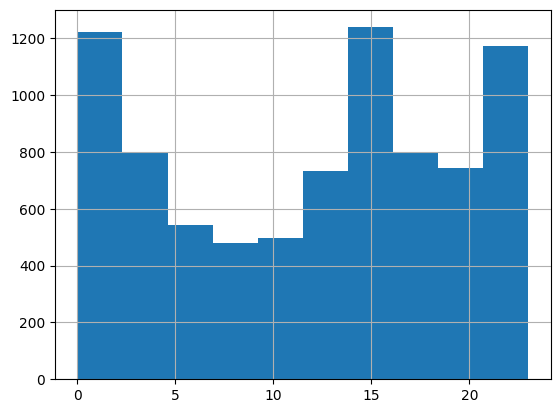

In [5]:
df2 = df.copy()
df2["hora"] = df.created_at.dt.hour
df2.hora.hist()
